> 🩺 Este notebook forma parte del proyecto **NutriSynthCare**, un entorno de simulación sobre salud pública y recomendaciones nutricionales personalizadas.  
>
> 👥 Desarrollado por:  
> - Daniel Cruz – [dCruzCoding](https://github.com/dCruzCoding)  
> - Aníbal García – [Aniballll](https://github.com/Aniballll)  
>
> 📁 Repositorio completo: [NutriSynthCare](https://github.com/tu-repo-aqui)  
>
> 📜 Licencia: Este proyecto está disponible bajo la licencia MIT. Consulta el archivo `LICENSE` para más información.  
>
> 🙏 Agradecimientos especiales a todas las fuentes de datos y literatura científica que han hecho posible la creación de las bases sintéticas utilizadas en este proyecto.  
>
> 🤝 ¿Te interesa colaborar? ¡Estás invitado!  
> Puedes contribuir mejorando los notebooks, proponiendo nuevas ideas o corrigiendo errores:  
> - Haz un fork del repo  
> - Crea una rama (`git checkout -b mejora/nueva-idea`)  
> - Abre un Pull Request explicando tu propuesta


# =========================================================================
# ⚙️ PIPELINE DE LA GENERACIÓN DE LA BASE DE DATOS
# RIESGO CARDIOVASCULAR ❤️ EN PERSONAS CON DIABETES 🩸
# =========================================================================

```text
+---------------------------------+      +-----------------------------------------+
|    DB Sintética 1: Diabetes     |      |  DB Sintética 2: Riesgo Cardiovascular  |
+---------------------------------+      +-----------------------------------------+
             |                                              |
             '--------------------. .-----------------------'
                                  |
                                  v
                  +--------------------------------+
                  |    1. UNIÓN DE BASES DE DATOS  |
                  |     (Outer Join por columnas   |
                  |           comunes)             |
                  +--------------------------------+
                                  |
                                  v
        +---------------------------------------------------------+
        |         Dataset Combinado con Valores Nulos (NaN)       |
        |  (Columnas exclusivas se rellenan con nulos para los    |
        |        registros que no tienen esa información)         |
        +---------------------------------------------------------+
                                  |
                                  v
          +----------------------------------------------------+
          |      2. IMPUTACIÓN CON ML Y REDES NEURONALES       |
          |  (Se predicen y rellenan los valores NaN usando   |
          |       las otras columnas como predictores)        |
          +----------------------------------------------------+
                                  |
                                  v
                  +------------------------------------+
                  |      DATASET FINAL COMPLETO        |
                  | (Listo para análisis y modelado)   |
                  +------------------------------------+

In [3]:
# Primera importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Cargamos los csv y lo convertimos en dataframe
df_diabetes = pd.read_csv("db_diabetes.csv")
df_cardio = pd.read_csv("db_cardio.csv")

display(df_diabetes)
display(df_cardio)

,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,40,Q2,Hombre,Tipo 1,27.9,5.84,4.45,210.75,96.23,53.87,134.36,129.3,81.8,2017
7996,38,Q1,Hombre,Tipo 2,33.0,7.81,79.93,226.15,107.71,43.00,158.55,135.6,90.3,2012
7997,46,Q2,Hombre,Tipo 1,25.9,7.37,12.61,215.13,103.98,50.24,115.98,130.2,82.9,2012
7998,63,Q4,Mujer,Tipo 1,21.4,8.10,0.39,228.54,108.89,54.81,144.61,146.3,82.7,2016


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
0,2016,53,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,30.464413,0,203.053597,228.381680,146.4,89.7
1,2013,66,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,21.307639,0,214.198250,246.749168,151.8,87.2
2,2017,68,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,32.672495,0,178.338545,214.823232,157.4,88.1
3,2014,60,Mujer,Aragón,Bajo,Sedentario,55-64,10548.19,Moderado,No consume,41.167111,0,208.059981,242.028543,175.5,95.1
4,2016,61,Mujer,Andalucía,Moderado,Sedentario,55-64,15698.34,Moderado,Bajo,31.813888,1,260.781259,243.954935,164.6,93.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2017,65,Mujer,Aragón,Alto,Sedentario,65+,17340.41,Alto,No consume,34.552264,1,223.883623,279.392294,173.5,102.4
7996,2018,54,Hombre,Madrid,Moderado,Moderado,45-54,44728.05,Moderado,Moderado,33.750597,0,224.147312,236.151003,155.0,96.7
7997,2018,60,Hombre,Cataluña,Bajo,Activo,55-64,23484.22,Moderado,No consume,26.453936,0,185.948301,189.107056,159.0,95.3
7998,2011,58,Hombre,Andalucía,Moderado,Moderado,55-64,11763.46,Moderado,Moderado,29.069816,0,215.525527,222.641802,162.7,106.6


In [5]:
display(df_diabetes.columns)
display(df_cardio.columns)

Index(['Edad', 'Cuartil_Edad', 'Sexo', 'Tipo_Diabetes', 'IMC', 'HbA1c',
       'Insulina', 'Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos', 'PAS',
       'PAD', 'Registro'],
      dtype='object')

Index(['Año_Registro', 'Edad', 'Sexo', 'Comunidad_Autonoma',
       'Riesgo_Cardiovascular', 'Actividad_Fisica', 'Tramo_Edad',
       'Ingresos_Anuales', 'Nivel_Estres', 'Consumo_Alcohol', 'IMC',
       'Diabetes', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD'],
      dtype='object')

## Paso 1. Crear una primera versión con las columnas comunes

### 🔍 Comparación y alineación de variables comunes

Antes de combinar las bases de datos `PRECOV_RIESGOCARDIO` y `PRECOV_DIABETES`, es necesario identificar qué variables tienen contenido equivalente entre ambas, y asegurarnos de que tengan el mismo nombre, tipo de dato y codificación. Esto es fundamental para que la unión de datos sea consistente y útil para el análisis posterior.

In [6]:
print("Info general y tipos de datos en df_cardio:")
print(df_cardio.info())
print("\nInfo general y tipos de datos en df_diabetes:")  
print(df_diabetes.info())


Info general y tipos de datos en df_cardio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año_Registro           8000 non-null   int64  
 1   Edad                   8000 non-null   int64  
 2   Sexo                   8000 non-null   object 
 3   Comunidad_Autonoma     8000 non-null   object 
 4   Riesgo_Cardiovascular  8000 non-null   object 
 5   Actividad_Fisica       8000 non-null   object 
 6   Tramo_Edad             8000 non-null   object 
 7   Ingresos_Anuales       8000 non-null   float64
 8   Nivel_Estres           8000 non-null   object 
 9   Consumo_Alcohol        8000 non-null   object 
 10  IMC                    8000 non-null   float64
 11  Diabetes               8000 non-null   int64  
 12  Colesterol_Total       8000 non-null   float64
 13  Trigliceridos          8000 non-null   float64
 14  PAS         


#### ✔️ Variables comunes encontradas

Las siguientes variables están presentes en ambas bases, aunque algunas requieren renombrarse o transformarse:

| Variable en `PRECOV_CARDIO`       | Variable en `PRECOV_DIABETES` | Comentario                                                            |
| --------------------------------- | ----------------------------- | --------------------------------------------------------------------- |
| `Edad`                            | `Edad`                        | Igual                                                                 |
| `Sexo`                            | `Sexo`                        | Igual                                                                 |
| `IMC`                             | `IMC`                         | Igual                                                                 |
| `Colesterol_Total`                | `Colesterol_Total`            | Igual                                                                 |
| `Trigliceridos`                   | `Trigliceridos`               | Igual                                                                 |
| `PAS`                             | `PAS`                         | Igual                                                                 |
| `PAD`                             | `PAD`                         | Igual                                                                 |
| `Diabetes`                        | `Tipo_Diabetes`               | Se convierte en binaria: 0 = no diabetes, 1 = tipo 1, 2 o Gestacional |
| `Año_Registro`                    | `Registro`                    | Se renombra a `Año_Registro`                                          |

#### 🛠 Preparación de variables

* Se renombran las columnas en `PRECOV_DIABETES` para que coincidan con las de `PRECOV_RIESGOCARDIO`.
* Se crea una nueva columna `Diabetes` a partir de `Tipo_Diabetes`.
* Se seleccionan solo las columnas comunes en ambos datasets para realizar la fusión posterior.
* Se verifican los tipos de datos y valores únicos para garantizar la compatibilidad.


In [7]:
# Renombrar columnas para alinear
df_diabetes.rename(columns={'Registro': 'Año_Registro'}, inplace=True)

# Crear columna 'Diabetes' a partir de 'Tipo_Diabetes'
df_diabetes['Diabetes'] = df_diabetes['Tipo_Diabetes'].apply(
    lambda x: 'No' if 'no' in x.lower() else 'Si'
)

df_diabetes

,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Año_Registro,Diabetes
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017,Si
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013,Si
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015,Si
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015,Si
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,40,Q2,Hombre,Tipo 1,27.9,5.84,4.45,210.75,96.23,53.87,134.36,129.3,81.8,2017,Si
7996,38,Q1,Hombre,Tipo 2,33.0,7.81,79.93,226.15,107.71,43.00,158.55,135.6,90.3,2012,Si
7997,46,Q2,Hombre,Tipo 1,25.9,7.37,12.61,215.13,103.98,50.24,115.98,130.2,82.9,2012,Si
7998,63,Q4,Mujer,Tipo 1,21.4,8.10,0.39,228.54,108.89,54.81,144.61,146.3,82.7,2016,Si


In [8]:
# Calcular y mostrar correlaciones de Diabetes con el resto de variables numéricas
df_diabetes['Diabetes'] = df_diabetes['Diabetes'].replace({'Si': 1, 'No': 0})

correlaciones_diabetes = df_diabetes.corr(numeric_only=True)['Diabetes'].sort_values(ascending=False)
print("Correlaciones de Diabetes con otras variables:")
print(correlaciones_diabetes)

# Calcular y mostrar correlaciones de Diabetes con el resto de variables numéricas
df_cardio['Diabetes'] = df_cardio['Diabetes'].replace({'Si': 1, 'No': 0})

correlaciones_cardio = df_cardio.corr(numeric_only=True)['Diabetes'].sort_values(ascending=False)
print("\nCorrelaciones de Diabetes con otras variables:")
print(correlaciones_cardio)

Correlaciones de Diabetes con otras variables:
Diabetes            1.000000
HbA1c               0.765913
Trigliceridos       0.694235
IMC                 0.635440
PAD                 0.610518
PAS                 0.584683
Colesterol_Total    0.567260
Insulina            0.441888
LDL                 0.420788
Edad                0.101769
Año_Registro       -0.014401
HDL                -0.414640
Name: Diabetes, dtype: float64

Correlaciones de Diabetes con otras variables:
Diabetes            1.000000
PAS                 0.568195
PAD                 0.560004
Trigliceridos       0.506488
Colesterol_Total    0.489150
IMC                 0.425101
Edad                0.259182
Año_Registro       -0.012048
Ingresos_Anuales   -0.303516
Name: Diabetes, dtype: float64


### 🔗 Unificación de datasets: selección de columnas comunes

Una vez que se han identificado y alineado las variables equivalentes entre los datasets `PRECOV_RIESGOCARDIO` y `PRECOV_DIABETES`, se procede a seleccionar únicamente las columnas que comparten contenido semántico y formato compatible. Esta selección tiene como objetivo permitir una unión coherente de los datos que amplíe la muestra disponible para futuros análisis y modelos predictivos sobre riesgo cardiovascular.

# OJO! NOVEDAD DE ESTA VERSION: Normalizar antes de unir.

In [9]:
from sklearn.preprocessing import StandardScaler

# Columnas a normalizar
cols_to_normalize = ['Trigliceridos', 'PAS', 'PAD','Edad', 'IMC']

def normalizar_y_guardar(df, cols):
    scaler = StandardScaler()
    df_normalizado = df.copy()
    df_normalizado[cols] = df_normalizado[cols].astype('float64')
    df_normalizado.loc[:, cols] = scaler.fit_transform(df[cols])
    parametros = {'media': scaler.mean_, 'std': scaler.scale_}
    return df_normalizado, parametros

# Aplicar a cada cohorte
df_cardio_norm, params_cardio = normalizar_y_guardar(df_cardio, cols_to_normalize)
df_diabetes_norm, params_diabetes = normalizar_y_guardar(df_diabetes, cols_to_normalize)

params_norm = {
    'cardio': params_cardio,
    'diabetes': params_diabetes
}


In [10]:
df_cardio_norm

,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
0,2016,-0.804483,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,-0.362909,0,203.053597,-0.525838,-1.113528,-1.128432
1,2013,1.050480,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,-2.271737,0,214.198250,0.114886,-0.658882,-1.507895
2,2017,1.335859,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,0.097390,0,178.338545,-0.998805,-0.187398,-1.371288
3,2014,0.194343,Mujer,Aragón,Bajo,Sedentario,55-64,10548.19,Moderado,No consume,1.868184,0,208.059981,-0.049786,1.336506,-0.308793
4,2016,0.337033,Mujer,Andalucía,Moderado,Sedentario,55-64,15698.34,Moderado,Bajo,-0.081596,1,260.781259,0.017413,0.418796,-0.490935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2017,0.907791,Mujer,Aragón,Alto,Sedentario,65+,17340.41,Alto,No consume,0.489248,1,223.883623,1.253595,1.168119,0.799237
7996,2018,-0.661794,Hombre,Madrid,Moderado,Moderado,45-54,44728.05,Moderado,Moderado,0.322132,0,224.147312,-0.254816,-0.389463,-0.065937
7997,2018,0.194343,Hombre,Cataluña,Bajo,Activo,55-64,23484.22,Moderado,No consume,-1.198936,0,185.948301,-1.895877,-0.052688,-0.278436
7998,2011,-0.091036,Hombre,Andalucía,Moderado,Moderado,55-64,11763.46,Moderado,Moderado,-0.653627,0,215.525527,-0.726065,0.258828,1.436734


### Ahora sí, llevamos a cabo la UNION

In [11]:
df_cardio_norm['Cohorte'] = 'cardio'
df_diabetes_norm['Cohorte'] = 'diabetes'

# UNION COMPLETA de las bases precovid, manteniendo todas las columnas
df_precov_full = pd.concat([df_cardio_norm, df_diabetes_norm], ignore_index=True, sort=False)
print(df_precov_full.columns)
df_precov_full

Index(['Año_Registro', 'Edad', 'Sexo', 'Comunidad_Autonoma',
       'Riesgo_Cardiovascular', 'Actividad_Fisica', 'Tramo_Edad',
       'Ingresos_Anuales', 'Nivel_Estres', 'Consumo_Alcohol', 'IMC',
       'Diabetes', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD',
       'Cohorte', 'Cuartil_Edad', 'Tipo_Diabetes', 'HbA1c', 'Insulina', 'LDL',
       'HDL'],
      dtype='object')


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,...,Trigliceridos,PAS,PAD,Cohorte,Cuartil_Edad,Tipo_Diabetes,HbA1c,Insulina,LDL,HDL
0,2016,-0.804483,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,...,-0.525838,-1.113528,-1.128432,cardio,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1.050480,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,...,0.114886,-0.658882,-1.507895,cardio,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1.335859,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,...,-0.998805,-0.187398,-1.371288,cardio,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,0.194343,Mujer,Aragón,Bajo,Sedentario,55-64,10548.19,Moderado,No consume,...,-0.049786,1.336506,-0.308793,cardio,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,0.337033,Mujer,Andalucía,Moderado,Sedentario,55-64,15698.34,Moderado,Bajo,...,0.017413,0.418796,-0.490935,cardio,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2017,-0.634414,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.361928,-0.692497,-0.478777,diabetes,Q2,Tipo 1,5.84,4.45,96.23,53.87
15996,2012,-0.809270,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.743030,-0.274150,0.519960,diabetes,Q1,Tipo 2,7.81,79.93,107.71,43.00
15997,2012,-0.109843,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.201495,-0.632733,-0.349528,diabetes,Q2,Tipo 1,7.37,12.61,103.98,50.24
15998,2016,1.376441,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.106274,0.436374,-0.373028,diabetes,Q4,Tipo 1,8.10,0.39,108.89,54.81


## Paso 2. ¿Qué hacemos con las variables exclusivas de cada dataframe?

### 🧪 Analizamos las variables exclusivas para futura imputacion de valores faltantes

Hasta ahora hemos trabajado solo con las variables comunes entre ambos datasets (`df_cardio` y `df_diabetes_clean`), pero ahora realizamos una fusión más completa:

- Se conservan todas las variables, incluidas aquellas exclusivas de cada dataset.
- Las variables no compartidas se completan con `NaN` en las filas del dataset donde no estaban originalmente.
- Esto nos permitirá conservar toda la información disponible y usarla más adelante para análisis o entrenamiento del modelo.


In [12]:
# Verificamos la unión
print("📋 Información general del dataframe unificado:")
print(df_precov_full.info())

📋 Información general del dataframe unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año_Registro           16000 non-null  int64  
 1   Edad                   16000 non-null  float64
 2   Sexo                   16000 non-null  object 
 3   Comunidad_Autonoma     8000 non-null   object 
 4   Riesgo_Cardiovascular  8000 non-null   object 
 5   Actividad_Fisica       8000 non-null   object 
 6   Tramo_Edad             8000 non-null   object 
 7   Ingresos_Anuales       8000 non-null   float64
 8   Nivel_Estres           8000 non-null   object 
 9   Consumo_Alcohol        8000 non-null   object 
 10  IMC                    16000 non-null  float64
 11  Diabetes               16000 non-null  int64  
 12  Colesterol_Total       16000 non-null  float64
 13  Trigliceridos          16000 non-null  float64
 14  PAS    

In [13]:
# Calcular y mostrar correlaciones de Diabetes con el resto de variables numéricas
df_precov_full['Diabetes'] = df_precov_full['Diabetes'].replace({'Si': 1, 'No': 0})

correlaciones_diabetes = df_precov_full.corr(numeric_only=True)['Diabetes'].sort_values(ascending=False)
print("Correlaciones de Diabetes con otras variables:")
print(correlaciones_diabetes)

Correlaciones de Diabetes con otras variables:
Diabetes            1.000000
HbA1c               0.765913
Trigliceridos       0.553493
PAD                 0.539023
PAS                 0.530761
Colesterol_Total    0.503200
IMC                 0.489058
Insulina            0.441888
LDL                 0.420788
Edad                0.165502
Año_Registro       -0.010870
Ingresos_Anuales   -0.303516
HDL                -0.414640
Name: Diabetes, dtype: float64


### Eliminamos columnas sobrantes

Eliminaremos la variable `Cuartil_Edad` y `Tramo_Edad` porque, a pesar de buscar lo mismo no sabemos si han sido construida bajo los mismos parámetros. Lo mejor: eliminarlas y volver a generarla más adelante si hiciera falta. 

In [14]:
# Eliminación de las variables Cuartil_Edad y Tramo_Edad si existen
for col in ['Cuartil_Edad', 'Tramo_Edad']:
    if col in df_precov_full.columns:
        df_precov_full.drop(columns=col, inplace=True)
        print(f"\nVariable '{col}' eliminada correctamente.")
    else:
        print(f"\nLa variable '{col}' no existe en el dataframe.")


Variable 'Cuartil_Edad' eliminada correctamente.

Variable 'Tramo_Edad' eliminada correctamente.


### ¡IMPORTANTE! ¿Qué hacemos con los datos faltantes en las columnas exclusivas?

Al combinar dos bases de datos con variables exclusivas de cada una, inevitablemente encontraremos valores faltantes (NaNs) en esas columnas para las filas provenientes del otro dataset. Estos valores faltantes no son aleatorios, sino estructurales, ya que cada base tiene variables que la otra no tiene.

Por tanto, debemos decidir cómo imputar esos datos para no perder información valiosa y evitar sesgos en los modelos posteriores.

**Nuestra estrategia será:**

1. **ANOVA: Analizar las diferencias entre las muestras de ambas databases** para saber si hay diferencias lo que, a nivel teórico, dificultaría la validez de la imputación.

2. **Exploración inicial de la relación de las variables con missing con otras variables completas**, para evaluar la viabilidad de la imputación basada en modelos.


In [15]:
# 1. Analizar las diferencias entre las muestras de ambas databases

# AÑADIMOS una variable a la database que identifique si los valores son de db_cardio o de db_diabetes

df_precov_full['Database'] = np.where(df_precov_full['Ingresos_Anuales'].notna(), 
                                      'Cardio', 
                                      'Diabetes')

# Verificación
print("\nVerificación de la distribución:")
print(df_precov_full['Database'].value_counts())


df_precov_full.info()


Verificación de la distribución:
Database
Cardio      8000
Diabetes    8000
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año_Registro           16000 non-null  int64  
 1   Edad                   16000 non-null  float64
 2   Sexo                   16000 non-null  object 
 3   Comunidad_Autonoma     8000 non-null   object 
 4   Riesgo_Cardiovascular  8000 non-null   object 
 5   Actividad_Fisica       8000 non-null   object 
 6   Ingresos_Anuales       8000 non-null   float64
 7   Nivel_Estres           8000 non-null   object 
 8   Consumo_Alcohol        8000 non-null   object 
 9   IMC                    16000 non-null  float64
 10  Diabetes               16000 non-null  int64  
 11  Colesterol_Total       16000 non-null  float64
 12  Trigliceridos          16000 non-null  float64
 13  PAS

## ESTUDIO ANOVA para ver la homogeneidad de las muestras de ambas databases

🚀 INICIANDO VALIDACIÓN DE BASES DE DATOS: ANOVA Cardio vs. Diabetes 🚀


El objetivo es ver si los dos grupos son suficientemente similares en sus
variables comunes como para justificar una imputación cruzada.

Hipótesis Nula (H0): Las distribuciones de la variable en ambos grupos son iguales.
Un p-value < 0.05 sugiere que los grupos son significativamente diferentes.


--- 1. ANÁLISIS DE VARIABLES CATEGÓRICAS ---

Análisis para la variable: 'Sexo'
Tabla de Contingencia:
Sexo      Hombre  Mujer
Database               
Cardio      3971   4029
Diabetes    4382   3618
Test Chi-cuadrado: p-value = 0.0000
🚨 ¡Resultado SIGNIFICATIVO! Las proporciones de 'Sexo' son diferentes entre los grupos Cardio y Diabetes.

----------------------------------------
Análisis para la variable: 'Diabetes'
Tabla de Contingencia:
Diabetes     0     1
Database            
Cardio    5639  2361
Diabetes  2517  5483
Test Chi-cuadrado: p-value = 0.0000
🚨 ¡Resultado SIGNIFICATIVO! Las proporciones de 'Diabetes' son diferentes entre los grupos Cardio y Diabetes.

------------------------

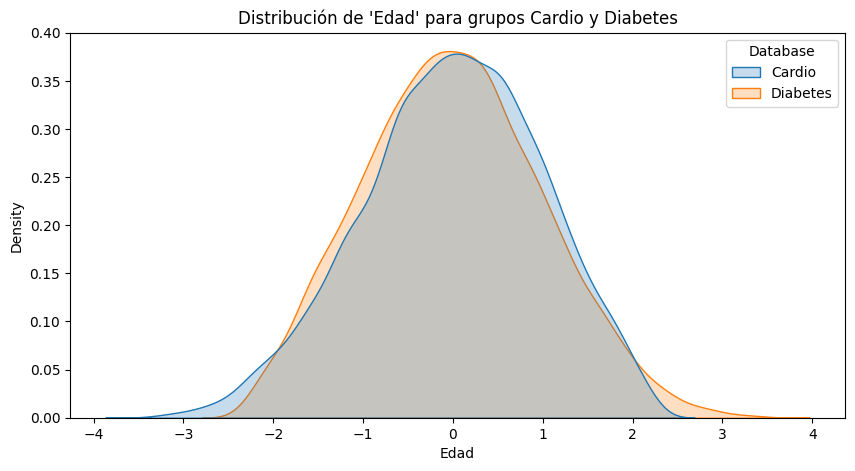

----------------------------------------
Análisis para la variable: 'IMC'
Test de Mann-Whitney U: p-value = 0.0682
✅ Resultado no significativo. La distribución de 'IMC' es similar en ambos grupos.



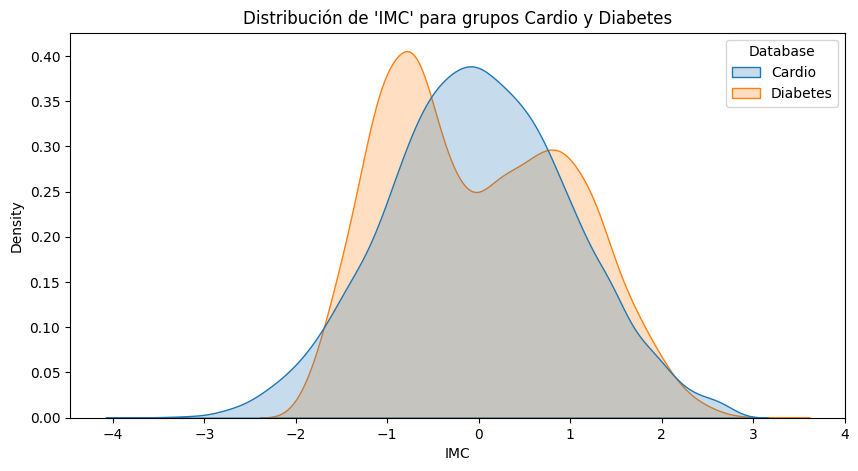

----------------------------------------
Análisis para la variable: 'Año_Registro'
Test de Mann-Whitney U: p-value = 0.6751
✅ Resultado no significativo. La distribución de 'Año_Registro' es similar en ambos grupos.



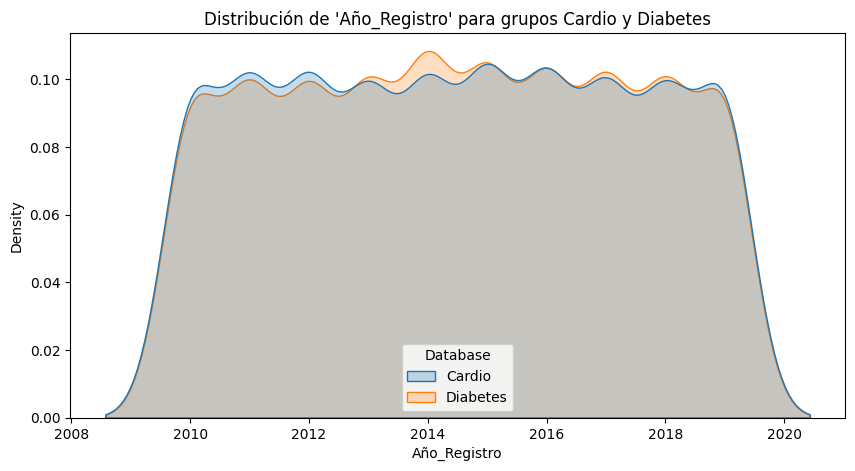

----------------------------------------
Análisis para la variable: 'Colesterol_Total'
Test de Mann-Whitney U: p-value = 0.0000
🚨 ¡Resultado SIGNIFICATIVO! La distribución de 'Colesterol_Total' es diferente entre los grupos Cardio y Diabetes.



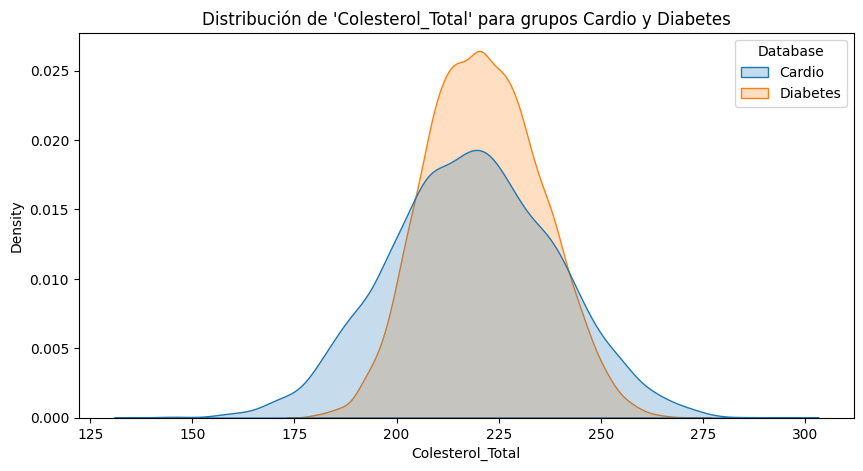

----------------------------------------
Análisis para la variable: 'Trigliceridos'
Test de Mann-Whitney U: p-value = 0.6631
✅ Resultado no significativo. La distribución de 'Trigliceridos' es similar en ambos grupos.



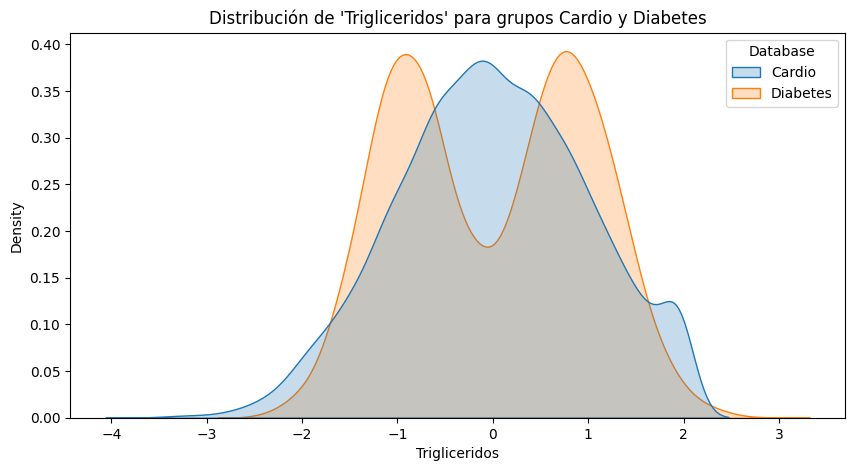

----------------------------------------
Análisis para la variable: 'PAS'
Test de Mann-Whitney U: p-value = 0.9248
✅ Resultado no significativo. La distribución de 'PAS' es similar en ambos grupos.



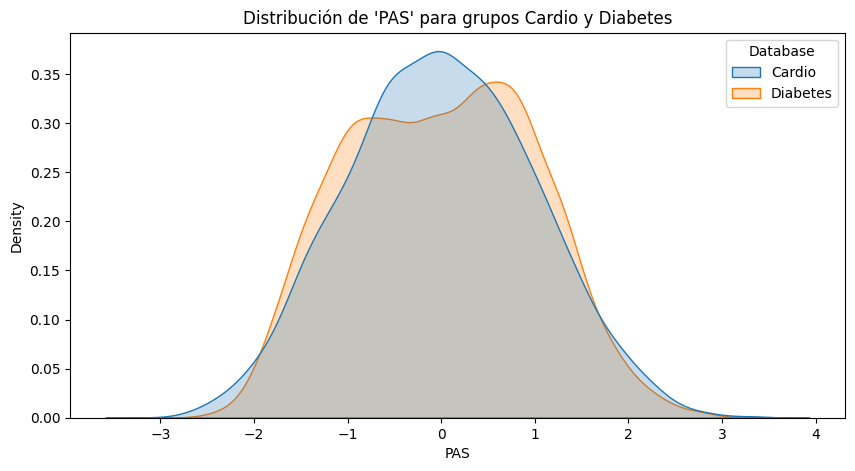

----------------------------------------
Análisis para la variable: 'PAD'
Test de Mann-Whitney U: p-value = 0.9297
✅ Resultado no significativo. La distribución de 'PAD' es similar en ambos grupos.



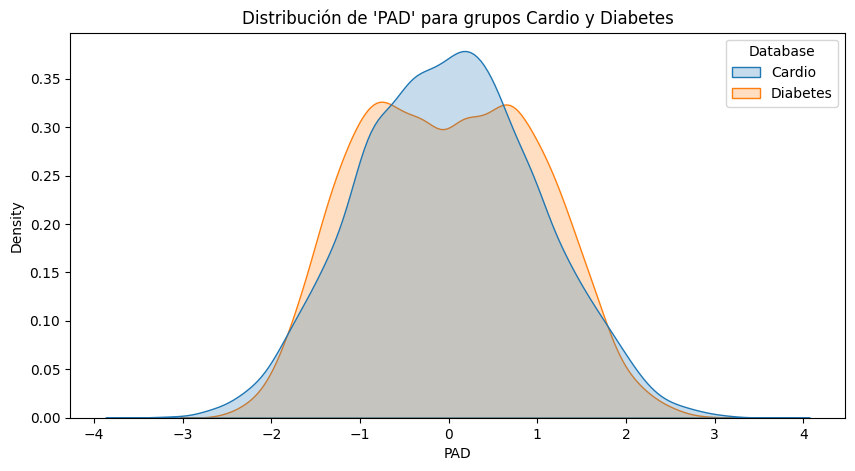

----------------------------------------

🏁 VALIDACIÓN FINALIZADA 🏁


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas CATEGÓRICAS comunes a ambas bases de datos
common_categorical_cols = [
    'Sexo', 
    'Diabetes' 
]

# Lista de columnas NUMÉRICAS comunes a ambas bases de datos
common_numerical_cols = [
    'Edad', 
    'IMC',
    'Año_Registro',
    'Colesterol_Total',
    'Trigliceridos',
    'PAS',
    'PAD'
]

# Nombre de la columna de origen
origin_col = 'Database'

# ---------------------------------------------------------------------------
# --- COMIENZA EL ANÁLISIS AUTOMÁTICO ---
# ---------------------------------------------------------------------------

print("🚀 INICIANDO VALIDACIÓN DE BASES DE DATOS: ANOVA Cardio vs. Diabetes 🚀")
print("="*60)
print("El objetivo es ver si los dos grupos son suficientemente similares en sus")
print("variables comunes como para justificar una imputación cruzada.\n")
print("Hipótesis Nula (H0): Las distribuciones de la variable en ambos grupos son iguales.")
print("Un p-value < 0.05 sugiere que los grupos son significativamente diferentes.\n")

# --- 1. Análisis de Variables Categóricas ---
print("\n--- 1. ANÁLISIS DE VARIABLES CATEGÓRICAS ---\n")

for col in common_categorical_cols:
    print(f"Análisis para la variable: '{col}'")
    
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df_precov_full[origin_col], df_precov_full[col])
    print("Tabla de Contingencia:")
    print(contingency_table)
    
    # Realizar Test de Chi-cuadrado
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Test Chi-cuadrado: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"🚨 ¡Resultado SIGNIFICATIVO! Las proporciones de '{col}' son diferentes entre los grupos Cardio y Diabetes.\n")
    else:
        print(f"✅ Resultado no significativo. Las proporciones de '{col}' son similares en ambos grupos.\n")
    print("-" * 40)

# --- 2. Análisis de Variables Numéricas ---
print("\n--- 2. ANÁLISIS DE VARIABLES NUMÉRICAS ---\n")

# Preparar los datos para los tests
group_cardio = df_precov_full[df_precov_full[origin_col] == 'Cardio']
group_diabetes = df_precov_full[df_precov_full[origin_col] == 'Diabetes']

for col in common_numerical_cols:
    print(f"Análisis para la variable: '{col}'")
    
    # Test de Mann-Whitney U
    # Compara si las distribuciones de los dos grupos son iguales. No asume normalidad.
    stat, p_value = mannwhitneyu(group_cardio[col].dropna(), group_diabetes[col].dropna())
    
    print(f"Test de Mann-Whitney U: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"🚨 ¡Resultado SIGNIFICATIVO! La distribución de '{col}' es diferente entre los grupos Cardio y Diabetes.\n")
    else:
        print(f"✅ Resultado no significativo. La distribución de '{col}' es similar en ambos grupos.\n")
        
    # Visualización
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df_precov_full, x=col, hue=origin_col, fill=True, common_norm=False)
    plt.title(f"Distribución de '{col}' para grupos Cardio y Diabetes")
    plt.show()
    print("-" * 40)

print("\n🏁 VALIDACIÓN FINALIZADA 🏁")

Variables numéricas con missing: ['Ingresos_Anuales', 'HbA1c', 'Insulina', 'LDL', 'HDL']
Variables numéricas completas: ['Año_Registro', 'Edad', 'IMC', 'Diabetes', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD']

Correlaciones (Spearman) variables con missing vs completas:


,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
Ingresos_Anuales,0.017143,-0.321497,-0.194102,-0.325363,-0.252932,-0.270630,-0.309558,-0.293739
HbA1c,-0.006019,0.111787,0.574736,0.790492,0.461359,0.526224,0.542790,0.576649
Insulina,-0.015813,0.263989,0.704215,0.380913,0.482214,0.664557,0.628135,0.637459
LDL,0.010537,0.223132,0.570502,0.440519,0.436787,0.568515,0.550638,0.559201
HDL,0.016255,-0.237860,-0.548232,-0.426901,-0.433911,-0.554915,-0.536591,-0.552535


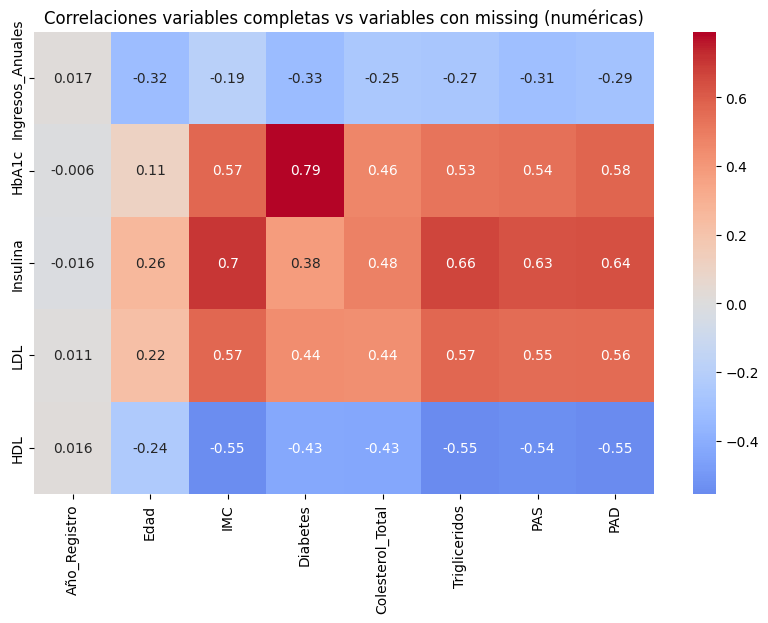

✅ Resultados test Chi-cuadrado entre variables categóricas:


,Variable,Group_Variable,p_value
0,Comunidad_Autonoma,Sexo,4.315347e-01
1,Comunidad_Autonoma,Diabetes,1.346822e-16
2,Nivel_Estres,Sexo,1.135819e-06
3,Nivel_Estres,Diabetes,2.145891e-61
4,Actividad_Fisica,Sexo,1.863734e-06
5,Actividad_Fisica,Diabetes,7.649476e-226
6,Consumo_Alcohol,Sexo,6.273914e-10
7,Consumo_Alcohol,Diabetes,1.253835e-02
8,Riesgo_Cardiovascular,Sexo,1.883551e-52
9,Riesgo_Cardiovascular,Diabetes,0.000000e+00


----- Interpretación del análisis de variables numéricas con missing -----
- Variable 'Ingresos_Anuales' no presenta correlaciones significativas con variables completas (máx 0.33).
 ⚠️ Se puede probar imputación básica o explorar otras estrategias para imputar esta variable.
- Variable 'HbA1c' tiene correlación significativa (|0.79|) con 'Diabetes'.
 ✅ Puede ser viable aplicar métodos de imputación basados en modelos usando esta variable como predictor.
- Variable 'Insulina' tiene correlación significativa (|0.70|) con 'IMC'.
 ✅ Puede ser viable aplicar métodos de imputación basados en modelos usando esta variable como predictor.
- Variable 'LDL' tiene correlación significativa (|0.57|) con 'IMC'.
 ✅ Puede ser viable aplicar métodos de imputación basados en modelos usando esta variable como predictor.
- Variable 'HDL' tiene correlación significativa (|0.55|) con 'Trigliceridos'.
 ✅ Puede ser viable aplicar métodos de imputación basados en modelos usando esta variable como predictor.



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def analyze_numeric_missing(df):
    vars_with_na = df.columns[df.isnull().any()].tolist()
    vars_complete = df.columns[~df.isnull().any()].tolist()

    num_vars_with_na = df[vars_with_na].select_dtypes(include=[np.number]).columns.tolist()
    num_vars_complete = df[vars_complete].select_dtypes(include=[np.number]).columns.tolist()

    print(f"Variables numéricas con missing: {num_vars_with_na}")
    print(f"Variables numéricas completas: {num_vars_complete}")

    if not num_vars_with_na or not num_vars_complete:
        print("No hay variables numéricas suficientes para análisis de correlación.")
        return None

    corr_matrix = df[num_vars_complete + num_vars_with_na].corr(method='spearman')

    # Nos aseguramos de filtrar columnas e índices que existen
    valid_rows = [v for v in num_vars_with_na if v in corr_matrix.index]
    valid_cols = [v for v in num_vars_complete if v in corr_matrix.columns]

    corr_subset = corr_matrix.reindex(index=valid_rows, columns=valid_cols)

    print("\nCorrelaciones (Spearman) variables con missing vs completas:")
    display(corr_subset)

    plt.figure(figsize=(10,6))
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlaciones variables completas vs variables con missing (numéricas)')
    plt.show()

    return corr_subset




def analyze_categorical_missing(df, categorical_vars=None, group_vars=None):
    """
    Analiza asociaciones entre variables categóricas con missing y variables categóricas completas.
    Devuelve un DataFrame con los p-valores de los tests de Chi-cuadrado.
    """
    if categorical_vars is None:
        categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Detectar variables categóricas con y sin missing
    vars_with_na = df.columns[df.isnull().any()].tolist()
    categorical_vars_no_missing = [v for v in categorical_vars if v not in vars_with_na]
    
    if group_vars is None:
        group_vars = categorical_vars_no_missing
    
    if not group_vars:
        print("⚠️ No hay variables categóricas sin missing para usar como grupo.")
        print("ℹ️ Puedes pasar variables manualmente como argumento `group_vars`.")
        return None

    results = []

    for var in categorical_vars:
        if df[var].isnull().all():
            continue  # Saltar variables completamente vacías
        for gvar in group_vars:
            if var == gvar or df[gvar].isnull().all():
                continue
            sub_df = df[[var, gvar]].dropna()
            if sub_df.empty:
                continue
            contingency_table = pd.crosstab(sub_df[var], sub_df[gvar])
            if contingency_table.empty or (contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2):
                continue
            try:
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                results.append({'Variable': var, 'Group_Variable': gvar, 'p_value': p})
            except ValueError:
                continue
    
    if not results:
        print("⚠️ No se encontraron combinaciones con datos suficientes para realizar test Chi-cuadrado.")
        return None
    
    results_df = pd.DataFrame(results)
    print("✅ Resultados test Chi-cuadrado entre variables categóricas:")
    display(results_df)
    
    return results_df



def interpret_missing_analysis(df, corr_num, pval_cat, corr_threshold=0.5, pval_threshold=0.05):
    print("----- Interpretación del análisis de variables numéricas con missing -----")
    if corr_num is None or corr_num.empty:
        print("No hay análisis de correlaciones numéricas para interpretar.")
    else:
        for var in corr_num.index:
            corrs = corr_num.loc[var]
            corrs = corrs.dropna()
            if corrs.empty:
                print(f"- Variable '{var}' no tiene correlaciones calculadas con variables completas.")
                continue
            max_corr = corrs.abs().max()
            best_var = corrs.abs().idxmax()
            if max_corr >= corr_threshold:
                print(f"- Variable '{var}' tiene correlación significativa (|{max_corr:.2f}|) con '{best_var}'.")
                print(" ✅ Puede ser viable aplicar métodos de imputación basados en modelos usando esta variable como predictor.")
            else:
                print(f"- Variable '{var}' no presenta correlaciones significativas con variables completas (máx {max_corr:.2f}).")
                print(" ⚠️ Se puede probar imputación básica o explorar otras estrategias para imputar esta variable.")

    print("\n----- Interpretación del análisis de variables categóricas con missing -----")
    if pval_cat is None or pval_cat.empty:
        print("No hay análisis de asociaciones categóricas para interpretar.")
    else:
        grouped = pval_cat.groupby('Variable')
        for var, group in grouped:
            print(f"- Variable categórica '{var}':")
            sig_assoc = group[group['p_value'] < pval_threshold]
            if not sig_assoc.empty:
                for _, row in sig_assoc.iterrows():
                    print(f"  Asociada significativamente con '{row['Group_Variable']}' (p={row['p_value']:.4f}).")
                print("  ✅ Puede ser viable aplicar imputación basada en estas variables.")
            else:
                print("  ❌ No se detectan asociaciones significativas con variables completas.")
                print("  ⚠️ Se puede probar imputación básica o explorar otras estrategias.")

# ----------------------
# Uso ejemplo, ajusta a tu contexto:

categorical_vars = ['Comunidad_Autonoma','Nivel_Estres', 'Actividad_Fisica', 'Consumo_Alcohol', 'Riesgo_Cardiovascular', 'Tipo_Diabetes']
group_vars = ['Sexo', 'Diabetes']

corr_num = analyze_numeric_missing(df_precov_full)
pval_cat = analyze_categorical_missing(df_precov_full, categorical_vars, group_vars)

interpret_missing_analysis(df_precov_full, corr_num, pval_cat, corr_threshold=0.5, pval_threshold=0.05)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def linear_regression_missing_analysis_full(df, corr_num, corr_threshold=0.3, r2_threshold=0.3):
    """
    Realiza regresión lineal simple para todas las combinaciones válidas entre
    variables con missing y variables completas significativamente correlacionadas.
    
    Args:
        df: DataFrame con los datos
        corr_num: DataFrame de correlaciones obtenido de analyze_numeric_missing()
        corr_threshold: Umbral mínimo de correlación para considerar un predictor
        r2_threshold: Umbral para considerar que una variable explica suficiente varianza
    """
    if corr_num is None or corr_num.empty:
        print("No hay análisis de correlaciones numéricas para realizar regresión.")
        return None
    
    print("\n----- Análisis de Regresión Lineal Simple (Múltiples Predictores) -----")
    print(f"Evaluando todas las variables completas con correlación > |{corr_threshold}|\n")
    
    results = []
    
    for target_var in corr_num.index:
        # Obtener todas las variables completas con correlación significativa
        valid_predictors = corr_num.loc[target_var].dropna()
        valid_predictors = valid_predictors[abs(valid_predictors) >= corr_threshold]
        
        if valid_predictors.empty:
            print(f"- {target_var}: No hay predictores con correlación > |{corr_threshold}|")
            continue
            
        print(f"\nVariable con missing: {target_var}")
        print(f"Predictores disponibles: {', '.join(valid_predictors.index)}")
        
        for predictor in valid_predictors.index:
            # Preparar datos
            valid_data = df[[target_var, predictor]].dropna()
            if len(valid_data) < 10:
                print(f"  {predictor}: Datos insuficientes ({len(valid_data)} observaciones válidas)")
                continue
                
            X = valid_data[[predictor]].values
            y = valid_data[target_var].values
            
            # Ajustar modelo
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)
            
            results.append({
                'Variable_Missing': target_var,
                'Predictor': predictor,
                'Correlacion': corr_num.loc[target_var, predictor],
                'R2': r2,
                'Coeficiente': model.coef_[0],
                'Intercepto': model.intercept_,
                'N_Observaciones': len(valid_data)
            })
    
    if not results:
        print("\nNo se pudo realizar regresión para ninguna combinación.")
        return None
    
    results_df = pd.DataFrame(results)
    
    # Ordenar por Variable_Missing y R² descendente
    results_df = results_df.sort_values(['Variable_Missing', 'R2'], ascending=[True, False])
    
    # Mostrar resultados
    with pd.option_context('display.max_rows', None, 'display.float_format', '{:.4f}'.format):
        display(results_df)
    
    # Interpretación agrupada por variable con missing
    print("\n----- Interpretación por Variable -----")
    grouped = results_df.groupby('Variable_Missing')
    
    for var, group in grouped:
        print(f"\nVariable: {var}")
        best_model = group.iloc[0]  # El modelo con mayor R²
        
        if best_model['R2'] >= r2_threshold:
            print(f"✅ Mejor predictor: '{best_model['Predictor']}' (R² = {best_model['R2']:.3f})")
            print(f"   Ecuación: {var} = {best_model['Intercepto']:.2f} + {best_model['Coeficiente']:.2f}*{best_model['Predictor']}")
            
            # Mostrar otros predictores útiles
            other_models = group[group['R2'] >= r2_threshold].iloc[1:]
            if not other_models.empty:
                print("   Otros predictores útiles:")
                for _, row in other_models.iterrows():
                    print(f"   - {row['Predictor']} (R² = {row['R2']:.3f})")
        else:
            print(f"⚠️ Mejor predictor: '{best_model['Predictor']}' (R² = {best_model['R2']:.3f})")
            print("   Ningún predictor explica suficiente varianza para imputación basada en regresión")
        
        # Mostrar resumen de todos los predictores
        print("\n   Resumen de predictores:")
        for _, row in group.iterrows():
            print(f"   - {row['Predictor']}: Corr = {row['Correlacion']:.2f}, R² = {row['R2']:.3f}")
    
    return results_df

regression_results = linear_regression_missing_analysis_full(df_precov_full, corr_num, corr_threshold=0.3)


----- Análisis de Regresión Lineal Simple (Múltiples Predictores) -----
Evaluando todas las variables completas con correlación > |0.3|


Variable con missing: Ingresos_Anuales
Predictores disponibles: Edad, Diabetes, PAS

Variable con missing: HbA1c
Predictores disponibles: IMC, Diabetes, Colesterol_Total, Trigliceridos, PAS, PAD

Variable con missing: Insulina
Predictores disponibles: IMC, Diabetes, Colesterol_Total, Trigliceridos, PAS, PAD

Variable con missing: LDL
Predictores disponibles: IMC, Diabetes, Colesterol_Total, Trigliceridos, PAS, PAD

Variable con missing: HDL
Predictores disponibles: IMC, Diabetes, Colesterol_Total, Trigliceridos, PAS, PAD


,Variable_Missing,Predictor,Correlacion,R2,Coeficiente,Intercepto,N_Observaciones
24,HDL,Trigliceridos,-0.5549,0.3104,-4.3955,50.1629,8000
26,HDL,PAD,-0.5525,0.2879,-4.2330,50.1629,8000
21,HDL,IMC,-0.5482,0.2856,-4.2163,50.1629,8000
25,HDL,PAS,-0.5366,0.2682,-4.0857,50.1629,8000
23,HDL,Colesterol_Total,-0.4339,0.1723,-0.2365,102.5418,8000
22,HDL,Diabetes,-0.4269,0.1719,-7.0445,54.9910,8000
4,HbA1c,Diabetes,0.7905,0.5866,2.3033,5.2261,8000
8,HbA1c,PAD,0.5766,0.3160,0.7850,6.8048,8000
3,HbA1c,IMC,0.5747,0.3061,0.7726,6.8048,8000
7,HbA1c,PAS,0.5428,0.2795,0.7383,6.8048,8000



----- Interpretación por Variable -----

Variable: HDL
✅ Mejor predictor: 'Trigliceridos' (R² = 0.310)
   Ecuación: HDL = 50.16 + -4.40*Trigliceridos

   Resumen de predictores:
   - Trigliceridos: Corr = -0.55, R² = 0.310
   - PAD: Corr = -0.55, R² = 0.288
   - IMC: Corr = -0.55, R² = 0.286
   - PAS: Corr = -0.54, R² = 0.268
   - Colesterol_Total: Corr = -0.43, R² = 0.172
   - Diabetes: Corr = -0.43, R² = 0.172

Variable: HbA1c
✅ Mejor predictor: 'Diabetes' (R² = 0.587)
   Ecuación: HbA1c = 5.23 + 2.30*Diabetes
   Otros predictores útiles:
   - PAD (R² = 0.316)
   - IMC (R² = 0.306)

   Resumen de predictores:
   - Diabetes: Corr = 0.79, R² = 0.587
   - PAD: Corr = 0.58, R² = 0.316
   - IMC: Corr = 0.57, R² = 0.306
   - PAS: Corr = 0.54, R² = 0.280
   - Trigliceridos: Corr = 0.53, R² = 0.260
   - Colesterol_Total: Corr = 0.46, R² = 0.185

Variable: Ingresos_Anuales
⚠️ Mejor predictor: 'Diabetes' (R² = 0.092)
   Ningún predictor explica suficiente varianza para imputación basada en re

In [19]:
# Exportar el df como archivo csv
df_precov_full.to_csv('db_cardiabetes.csv', index=False)
print("✅ Datos guardados en 'db_cardiabetes.csv'.")

✅ Datos guardados en 'db_cardiabetes.csv'.
